# DEXs Equations Studies

* 📚 This notebook is a work in progress in which we explore the various scenarios for DEXs.
* 💡 For an AMM CLI toolkit, check [this repo](https://github.com/go-outside-labs/amm-toolkit-py).

<br>

## 0. Installing dependencies

In [3]:
import numpy as np 
from matplotlib import pyplot


<br>

## 1. AMM Uniswap V2

<br>

#### The theory

In [the AMM Uniswap V2 model](https://github.com/Uniswap) (and its forks, such as [Sushiswap](https://github.com/sushiswap/sushiswap) or [PancakeSwap](https://github.com/pancakeswap)), a pool of two trading tokens (say X and Y) is characterized by the fact that the multiplication of the supply amount of these tokens, $x$ and $y$, is a constant: 


$$k = x \times y$$


When a trader buys an $\Delta x$ amount of token X, the constant becomes:

$$k = (x - \Delta x) \times (y + \Delta y)$$


Considering the need to pay a handling fee to the liquidity provider, we can define the handling fee percentage, $\rho$ as:

$$\gamma = 1 - \rho $$

So that the trading equation becomes:

$$k = (x - \Delta x) \times (y + \gamma \times \Delta y)$$

$$\gamma \times \Delta y = \frac{xy}{x - \Delta x} - y = \frac{xy - y(x - \Delta x)}{x - \Delta x}$$

$$ \Delta y  = \frac{1}{\gamma} \times \frac{y\Delta x}{x - \Delta x}$$


When a trader sells token X:

$$k = (x + \gamma \times \Delta x) \times (y -  \Delta y)$$

$$\Delta y = y - \frac{xy}{x + \gamma \times \Delta x} = \frac{y(x + \gamma \times \Delta x) - xy}{x + \gamma \times \Delta x}$$

$$\Delta y = \frac{y \times \gamma \Delta x}{x + \gamma \Delta x}$$

<br>

#### An example

Assuming that a liquidity pool contains 2 ETH and 1000 DAI, and each transaction pays the liquidity provider a handling fee of 0.3%.

When the trader sells $\Delta x = 1$ ETH and replaces it with DAI, we have:

$$\Delta y = \frac{1000 \times 0.997 \times \Delta x}{2 + 0.997 \times \Delta x} \approx 332.666$$

<br>

We can easily visualize this example by looking at its AMM curve, where:

<br>

In [4]:
k = 1000 * 2
x = np.linspace(1, 3, num=50)
y = k / x

<br>

plotting:
    
<br>

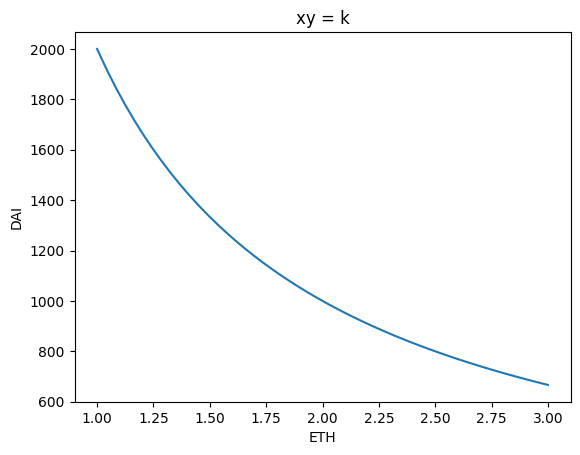

In [5]:
pyplot.title("xy = k") 
pyplot.xlabel("ETH") 
pyplot.ylabel("DAI") 
pyplot.plot(x, y)
pyplot.show()

<br>
<br>
<br>

## 2. AMM Curve Stableswap
<br>
<br>


<br>

#### The theory

In [the AMM Curve Stablecoin model](https://curve.fi/#/ethereum/pools), we consider the price curve on a constant $c$:

$$x + y = c$$

For example, if there USDC, DAI, and USDT in the liquidity pool:

$$x + y + z = c$$

Summing up the constant sum formula:

$$\sum_{i=1}^{n}x_i = c$$

Because of the lack of slippage, the low-cost exchange of traders will easily cause funds to tilt to one side.

<br>

#### The linear correlation

Let's plot this correlation for two stablecoins:

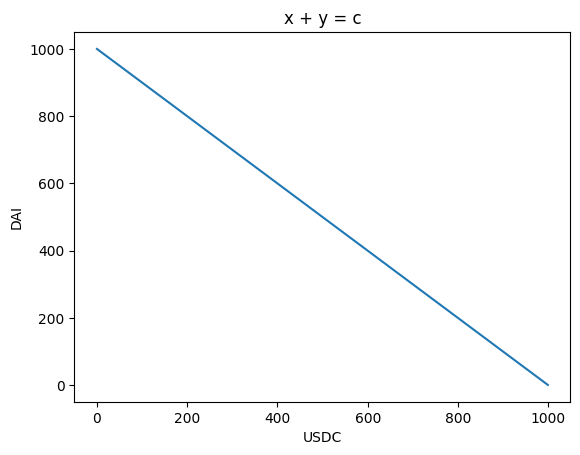

In [6]:
total = 1000
x = np.arange(0, 1000)
y = total - x
pyplot.title("x + y = c") 
pyplot.xlabel("USDC") 
pyplot.ylabel("DAI") 
pyplot.plot(x, y)
pyplot.show()

Now, we recall AMM Uniswap V2 price model, $x \times y = k$, the constant product equation becomes:

$$\prod_{i=1}^{n}x_i = k$$

Although it solves the slippage problem, the transaction cost is relatively high for stable currency transactions, and it is not suitable for direct application. The Curve stablecoin price model combines both:

$$\sum_{i=1}^{n}x_i + \prod_{i=1}^{n}x_i = D$$

<br>

#### A first approach

Suppose we have a pool of USDC + DAI = 10M. At the same time, $USDC * DAI = (\frac{10M}{2})^2$. The equation becomes:

$$(USDC + DAI) + (USDC \times DAI) = 10M + \left(\frac{10M}{2}\right)^2$$

generalized to:

$$\sum_{i=1}^{n}x_i + \prod_{i=1}^{n}x_i = D + \left(\frac{D}{n}\right)^n$$

Let's visualize this with:

In [7]:
D = 100
x = np.arange(0, D)
y = (D + (D / 2 ) ** 2 - x) / (1 + x)

Plotting:

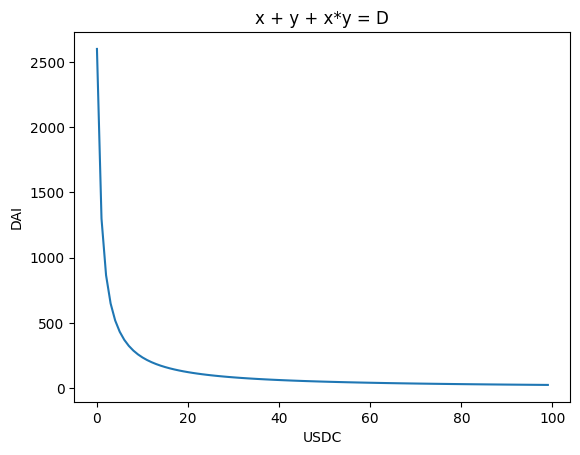

In [8]:
pyplot.title("x + y + x*y = D")
pyplot.xlabel("USDC")
pyplot.ylabel("DAI")
pyplot.plot(x, y)
pyplot.show()

<br>

#### A second approach

At this point, the price curve is close to $x \times y = k$ model. However, the constant sum has far less influence on the equation than the constant product. 

The equation needs to be modified, introducing a dimensionless parameter $D$ that does not depend on the total amount of tokens $\chi$. The constant sum equation is multiplied by $\chi D^{n-1}$, so we have:

$$\chi D^{n-1}\sum_{i=1}^{n}x_i + \prod_{i=1}^{n}x_i = \chi D^{n} + \left(\frac{D}{n}\right)^n$$

Note that when $\chi$ tends to 0, the price curve behaves close to the constant product equation $\prod_{i=1}^{n}x_i = k$.

Let's vizualize this with:

In [31]:
D = 100
chi = 0.05
A = D * chi
x = np.arange(0, D)
y = (D * A + (D / 2 ) ** 2 - A * x) / (A + x)

Plotting:

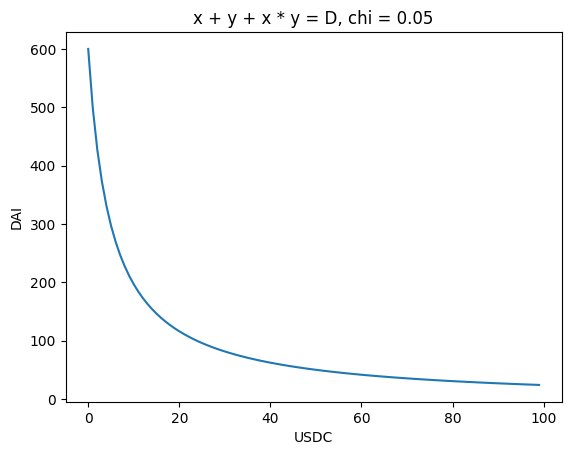

In [32]:
pyplot.title("x + y + x * y = D, chi = 0.05") 
pyplot.xlabel("USDC") 
pyplot.ylabel("DAI") 
pyplot.plot(x, y)
pyplot.show()

Now, notice that when, $\chi$ tends to $\infty$, the price curve behaves nearly constant and the equation $\sum_{i=1}^{n}x_i = c$, behaves linearly.

Let's vizualize this with:

In [33]:
D = 100
chi = 100
A = D * chi
x = np.arange(0, D)
y = (D * A + (D / 2 ) ** 2 - A * x) / (A + x)

Plotting:

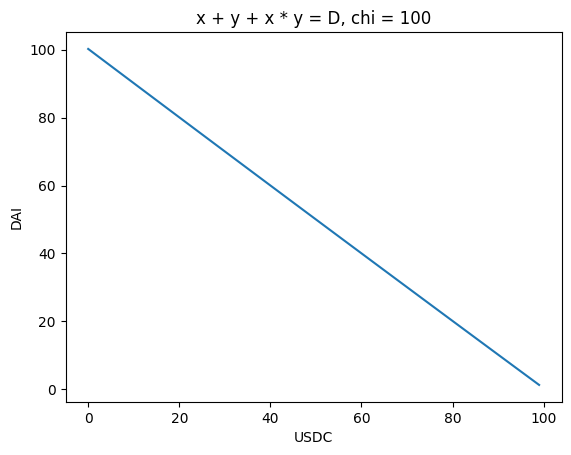

In [34]:
pyplot.title("x + y + x * y = D, chi = 100") 
pyplot.xlabel("USDC") 
pyplot.ylabel("DAI") 
pyplot.plot(x, y)
pyplot.show()

<br>

#### A third approach

To make the formula work for more prices than just the ideal price 1:1, we introduce a coefficient $A$, so that:

$$\chi = \frac{A\prod_{i=1}^{n}x_i}{(D / n)^n}$$

and

$$\chi D^{n-1}\sum_{i=1}^{n}x_i + \prod_{i=1}^{n}x_i = \chi D^{n} + \left(\frac{D}{n}\right)^n$$

Replacing $\chi$, we finally have:

$$An^n\sum_{i=1}^{n}x_i + D= ADn^{n} + \frac{D^{n + 1}}{n^n\prod_{i=1}^{n}x_i}$$

For each $x_i$, $D$ can be calculated, and even when it changes to $x_j$, the equation will hold.

<br>
<br>
<br>

## 3. PMM Pricing Equation
<br>
<br>

In the [Dodo Labs'] PMM model, the **base** equation is giving by:

$$P = i \left(1 - k + k \left(\frac{B_0}{B}\right)^2\right), \{k \in R : 0 \leq k \leq 1\}$$

and the **quote equation** by:

$$P = \frac{i}{\left(1 - k + k \left(\frac{Q_0}{Q}\right)^2\right)}, \{k \in R : 0 \leq k \leq 1\}$$

with:

* $i$: mid price
* $B$: current base token in stock
* $Q$: current quote token in stock
* $B_0$: initial base token in stock
* $Q_0$: initial quote token in stock

Let's start by looking at the base equation. 

When $k=0$, the price remains unchanged.

Let's vizualize this with:

In [35]:
k = 0
i = 4000  
B0 = 100  
B = np.arange(30, B0)  
P =  i * (1 - k + k * ((B0 / B) ** 2))

Plotting:

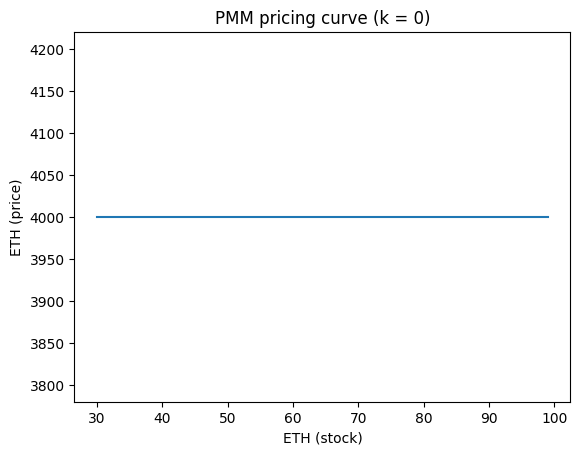

In [36]:
pyplot.title("PMM pricing curve (k = 0)") 
pyplot.xlabel("ETH (stock)") 
pyplot.ylabel("ETH (price)") 
pyplot.plot(B, P) 
pyplot.show()

Now, when $k=1$, this price curve becomes exactly the AMM bonding curve:

In [37]:
k = 1
B = np.arange(30, B0)  
P =  i * (1 - k + k * ((B0 / B) ** 2))

Plotting:

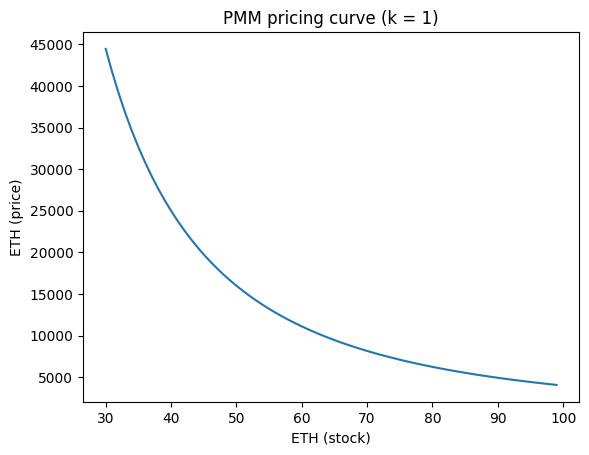

In [38]:
pyplot.title("PMM pricing curve (k = 1)") 
pyplot.xlabel("ETH (stock)") 
pyplot.ylabel("ETH (price)") 
pyplot.plot(B, P) 
pyplot.show()

We can see that when $k$ gets larger, changes in the price become more apparent. 
When $k$ gets smaller, changes in the price becomes less apparent.

In [39]:
k = 0.85 
B = np.arange(30, B0)  
P =  i * (1 - k + k * ((B0 / B) ** 2))

Plotting:

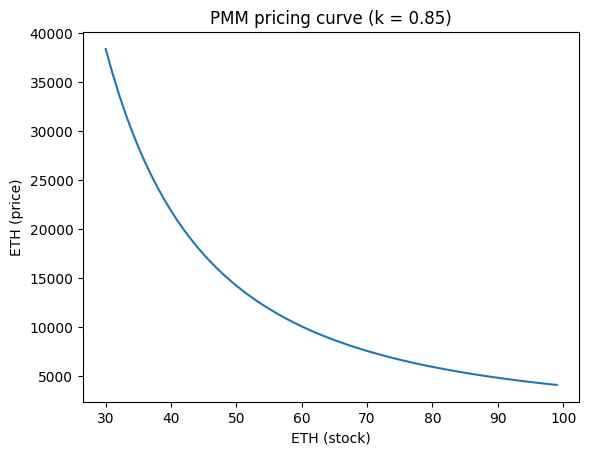

In [40]:
pyplot.title("PMM pricing curve (k = 0.85)") 
pyplot.xlabel("ETH (stock)") 
pyplot.ylabel("ETH (price)") 
pyplot.plot(B, P) 
pyplot.show()

In [42]:
k = 0.15
B = np.arange(30, B0)  
P =  i * (1 - k + k * ((B0 / B) ** 2))

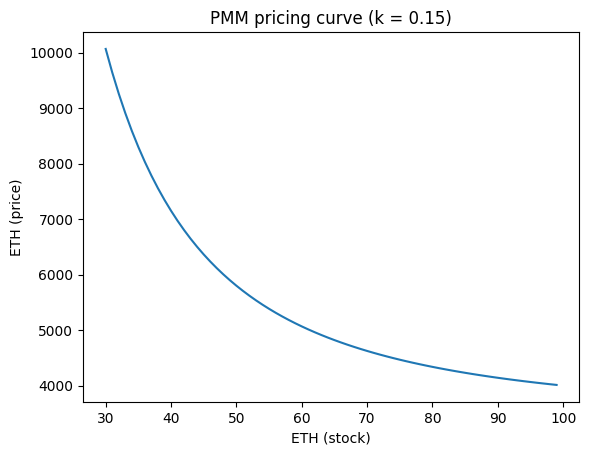

In [43]:
pyplot.title("PMM pricing curve (k = 0.15)") 
pyplot.xlabel("ETH (stock)") 
pyplot.ylabel("ETH (price)") 
pyplot.plot(B, P) 
pyplot.show()